In [1]:
#Import all the modules 

import requests
import json
import csv
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
from time import *
import plotly.express as px
import plotly.io as pio
pd.options.plotting.backend = "plotly"
pio.renderers.default = "plotly_mimetype+notebook_connected"
import plotly.graph_objects as go
import math

In [5]:
df = pd.read_csv('staking_pools.csv')
df['Percentage Stake'] = (df['Stake']/df['Stake'].sum())
#print(df)

In [22]:
nan_value = float("NaN")
df.replace("", nan_value, inplace=True)
df.dropna(subset = ["Service"], inplace=True)

In [30]:
lst = df.index[df['Stake'] > 0].tolist()
d = {}

In [31]:
for i in lst:
    if(d.get(df['Service'][i]) != None):
        d[df['Service'][i]] += df['Percentage Stake'][i]
    else:
        d[df['Service'][i]] = df['Percentage Stake'][i]

In [42]:
df1 = pd.DataFrame(d.items())
df1.rename(columns = {0: "service", 1: "percentage_stake"}, inplace=True)
df1.sort_values('percentage_stake',ascending=False)

,service,percentage_stake
5,Kraken,0.145224
18,Binance,0.057429
7,Whale,0.041999
20,Lido,0.035372
3,Bitcoin Suisse,0.033422
11,Staked.us,0.025786
9,Stakefish,0.021061
17,Huobi,0.016219
8,Defi,0.012037
4,Stkr,0.009317


In [60]:
ss_index = [0.167672,0.058603,0.042164,0.035271,0.033261,0.025467,0.020705,0.015870,0.011731,0.589256]
resource_percentage = [0.145200,0.057400,0.042000,0.035400,0.033400,0.025800,0.021100,0.016200,0.012000,0.611500]

value_per_unit_resource = []

ss_index_1 = [0.507689, 0.003661, 0.003661, 0.003661, 0.003661, 0.003661, 0.003661, 0.003661, 0.003661, 0.463025]
resource_percentage_1 = [0.350000, 0.004800, 0.004800, 0.004800, 0.004800, 0.004800, 0.004800, 0.004800, 0.004800, 0.611600]

value_per_unit_resource_1 = []

ss_index_2 = [0.044279,0.044279,0.044279,0.044279,0.044279,0.044279,0.044279,0.044279,0.044279,0.601489]
resource_percentage_2 = [0.043100,0.043100,0.043100,0.043100,0.043100,0.043100,0.043100,0.043100,0.043100,0.612100]

value_per_unit_resource_2 = []

for i in range(10):
    value_per_unit_resource.append(ss_index[i]/resource_percentage[i])
    value_per_unit_resource_1.append(ss_index_1[i]/resource_percentage_1[i])
    value_per_unit_resource_2.append(ss_index_2[i]/resource_percentage_2[i])
    
x_axis = [1,2,3,4,5,6,7,8,9,10]

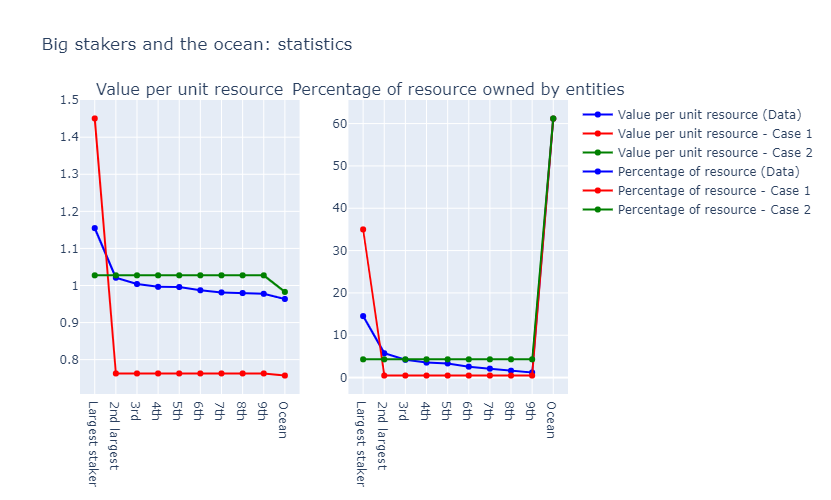

In [68]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=["Value per unit resource", "Percentage of resource owned by entities"]
)

fig.add_trace(
    go.Scatter(x=x_axis, y=value_per_unit_resource, name="Value per unit resource (Data)",  marker = dict(color = "blue")),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=x_axis, y=value_per_unit_resource_1, name="Value per unit resource - Case 1", marker = dict(color = "red")),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=x_axis, y=value_per_unit_resource_2, name="Value per unit resource - Case 2",  marker = dict(color = "green")),
    row=1, col=1
)


fig.add_trace(
    go.Scatter(x=x_axis, y=[r * 100 for r in resource_percentage], name="Percentage of resource (Data)",  marker = dict(color = "blue")),
    row=1, col=2
)


fig.add_trace(
    go.Scatter(x=x_axis, y=[r * 100 for r in resource_percentage_1], name="Percentage of resource - Case 1", marker = dict(color = "red")),
    row=1, col=2
)


fig.add_trace(
    go.Scatter(x=x_axis, y=[r * 100 for r in resource_percentage_2], name="Percentage of resource - Case 2",  marker = dict(color = "green")),
    row=1, col=2
)


fig.update_layout(
    height=500,
    width=1000,
    title_text="Big stakers and the ocean: statistics"   
)
fig.update_xaxes(
    row=1, col=1,
    tickmode="array", tickvals=np.arange(1,11), ticktext=["Largest staker", "2nd largest", "3rd", "4th", "5th", "6th", "7th", "8th", "9th", "Ocean"]
)
fig.update_xaxes(
    row=1, col=2,
    tickmode="array", tickvals=np.arange(1,11), ticktext=["Largest staker", "2nd largest", "3rd", "4th", "5th", "6th", "7th", "8th", "9th", "Ocean"]
)
fig.show()

In [71]:
files = ["attestor_slashing", "proposer_slashing", "block_count", "participation_rate", "exit_count", "deposits"]
dfs = []

for file in files:
    df = pd.read_csv(f"{file}.csv", header=None, names=["epoch", file])
    df.dropna(subset=["epoch"], inplace=True)
    dfs += [df[[file]]] # We don't want the epoch column

df = pd.concat([df[["epoch"]]] + dfs, axis=1) # Concat everything, with the epoch column first
df["participation_rate"] *= 100 # Set to percentages
df = df[df.epoch < max(df["epoch"])] # Remove last epoch (queried too soon)
df["epoch"] = df["epoch"].astype(int)

In [91]:
files = ["proposed_block_count_old", "global_participation_rate_old"]
dfs = []

for file in files:
    df1 = pd.read_csv(f"{file}.csv", header=None, names=["epoch", file])
    df1.dropna(subset=["epoch"], inplace=True)
    dfs += [df1[[file]]] # We don't want the epoch column

df1 = pd.concat([df1[["epoch"]]] + dfs, axis=1) # Concat everything, with the epoch column first
df1["global_participation_rate_old"] *= 100 # Set to percentages
df1 = df1[df1.epoch < max(df["epoch"])] # Remove last epoch (queried too soon)
df1["epoch"] = df1["epoch"].astype(int)

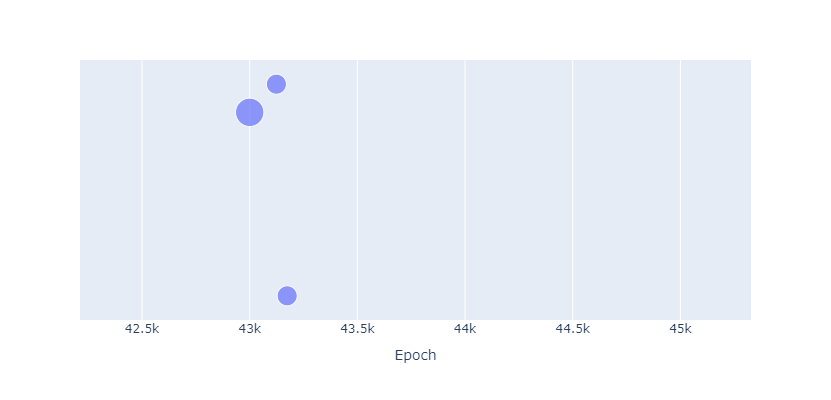

In [72]:
rng = np.random.default_rng(42)
df['temp'] = rng.uniform(0, 10, len(df["epoch"]))
fig = px.scatter(
    df[df.attestor_slashing > 0], x = 'epoch', y = 'temp', size = 'attestor_slashing',
    size_max = 20, width = 800, height = 400, labels = {"epoch": "Epoch"})
fig.update_xaxes(range=(min(df["epoch"]), max(df["epoch"])))
fig.update_yaxes(visible=False)

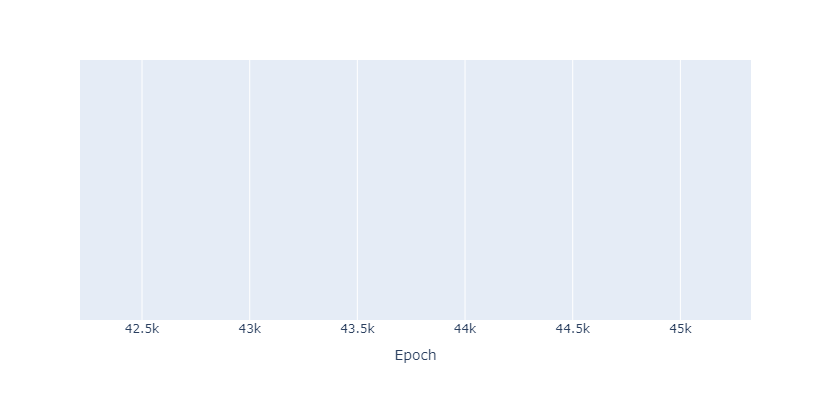

In [73]:
fig = px.scatter(
    df[df.proposer_slashing > 0], x = 'epoch', y = 'temp', size = 'proposer_slashing',
    size_max = 20, width = 800, height = 400, labels = {"epoch": "Epoch"})
fig.update_xaxes(range=(min(df["epoch"]), max(df["epoch"])))
fig.update_yaxes(visible=False)

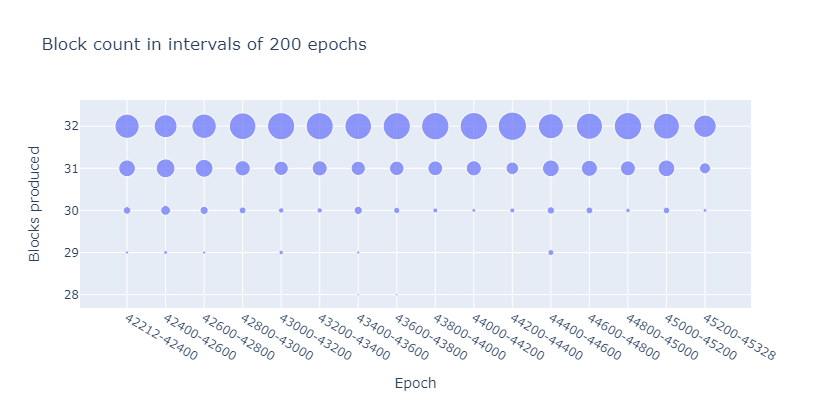

In [74]:
bucket_size = 200
df["bucket"] = np.floor_divide(df["epoch"], bucket_size)
df["n_bxs"] = 1
df_bucket = df[["bucket", "block_count", "n_bxs"]].groupby(["bucket", "block_count"]).sum("n_bxs").reset_index()
df_bucket["epoch"] = df_bucket.bucket.apply(
    lambda bucket: f"{max(min(df['epoch']), bucket * bucket_size)}-{min(max(df['epoch']), (bucket + 1) * bucket_size)}"
)

fig = px.scatter(df_bucket, x = 'epoch', y = 'block_count', size = 'n_bxs',
                 width=600, height=400, labels={ "block_count": "Blocks produced", "epoch": "Epoch", "n_bxs": "Count" },
                 title = f"Block count in intervals of {bucket_size} epochs")
fig
# fig.update_layout(xaxis=dict(
#     tickmode = 'array',
#     tickvals = df_bucket['epoch'],
#     ticktext = [str(int(s)) for s in df_bucket['epoch']]
# ))

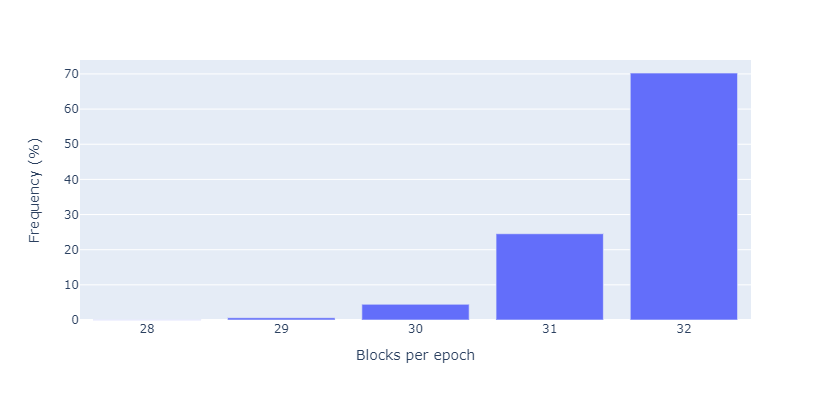

In [77]:
block_freq = df[['block_count']].value_counts(normalize=True).rename_axis('block_count').reset_index(name='freq')
block_freq["freq"] *= 100
px.bar(
    block_freq, x="block_count", y="freq", labels={"block_count": "Blocks per epoch", "freq": "Frequency (%)"},
    width=600, height=400
)

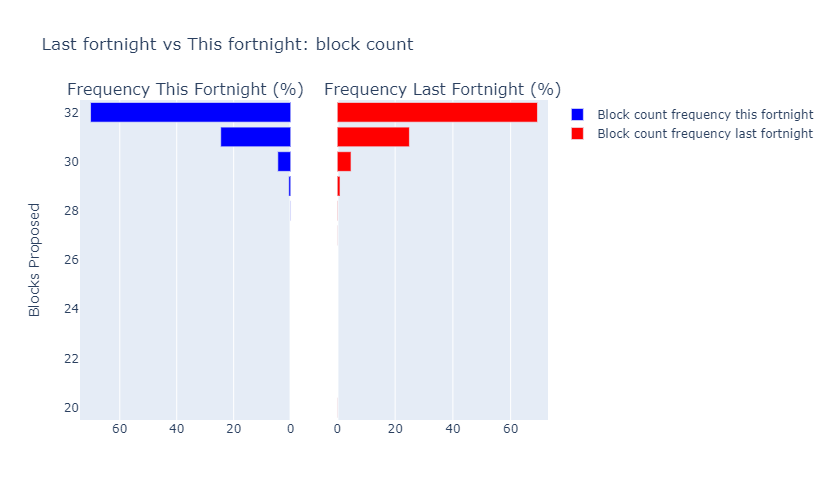

In [148]:
block_freq1 = df1[['proposed_block_count_old']].value_counts(normalize=True).rename_axis('block_count').reset_index(name='freq')
block_freq1["freq"] *= 100

# px.bar(
#     block_freq, y="block_count", x="freq", labels={"block_count": "Blocks per epoch", "freq": "Frequency (%)"},
#     width=600, height=400, orientation = 'h'
# )

from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=["Frequency This Fortnight (%)", "Frequency Last Fortnight (%)"], shared_xaxes=True,
                    shared_yaxes=True, horizontal_spacing=0.1)

fig.add_trace(
    go.Bar(x=block_freq["freq"], y=block_freq["block_count"], name="Block count frequency this fortnight", marker = dict(color = "blue"), orientation = 'h'),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=block_freq1["freq"], y=block_freq1["block_count"], name="Block count frequency last fortnight", marker = dict(color = "red"), orientation = 'h'),
    row=1, col=2
)

fig.update_layout(
    height=500,
    width=1000,
    title_text="Last fortnight vs This fortnight: block count"   
)

fig.update_yaxes(
    row=1, col=1,
    title = "Blocks Proposed"
)

# fig.update_yaxes(
#     row=1, col=2,
#     title = "Blocks Proposed"
# )

fig.update_xaxes(
    row=1, col=1,
    autorange = "reversed"
)



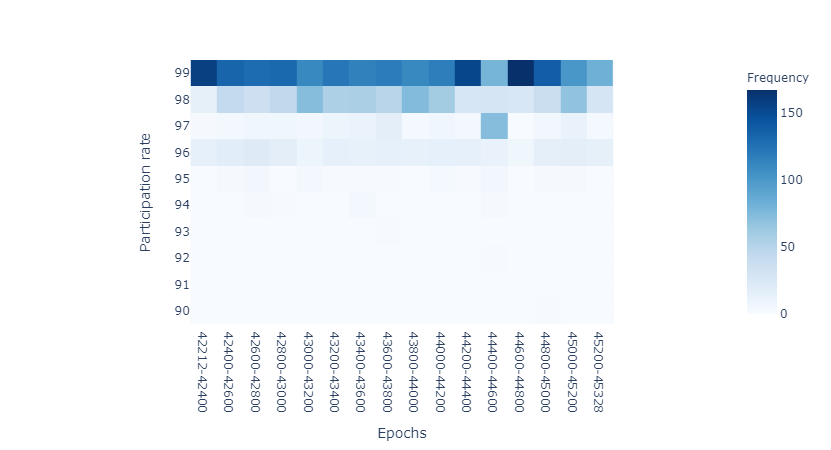

In [79]:
px.imshow(
    df_bucket.to_numpy(),
    labels=dict(x="Epochs", y="Participation rate", color="Frequency"),
    x = sorted(list(set(epoch_names))),
    y = [str(s) for s in np.flip(np.arange(int(min(df["participation_rate"])), 100))],
    color_continuous_scale='blues'
)

In [80]:
mean = df['participation_rate'].mean()
std = df['participation_rate'].std()
mini = min(df['participation_rate'])
median = df['participation_rate'].quantile(0.5)
maxi = max(df['participation_rate'])

print("           participation statistics")
print("-----------------------------------------------")
print("mean: {}".format(mean))
print("standard devidation: {}".format(std))
print("")
print("minimum: {}".format(mini))
print("median: {}".format(median))
print("maximum: {}".format(maxi))

           participation statistics
-----------------------------------------------
mean: 98.76521211960089
standard devidation: 0.9228996808584423

minimum: 90.38034081459044
median: 99.09178018569946
maximum: 99.76736903190611


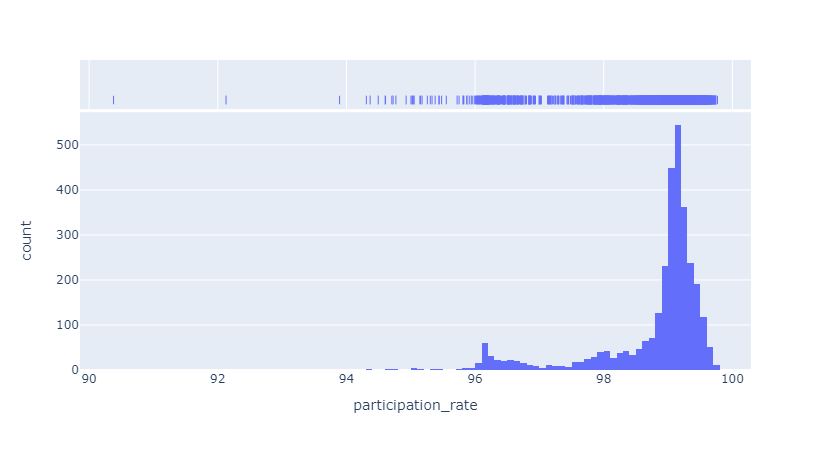

In [158]:
fig = px.histogram(df, x="participation_rate", marginal="rug")
fig.show()

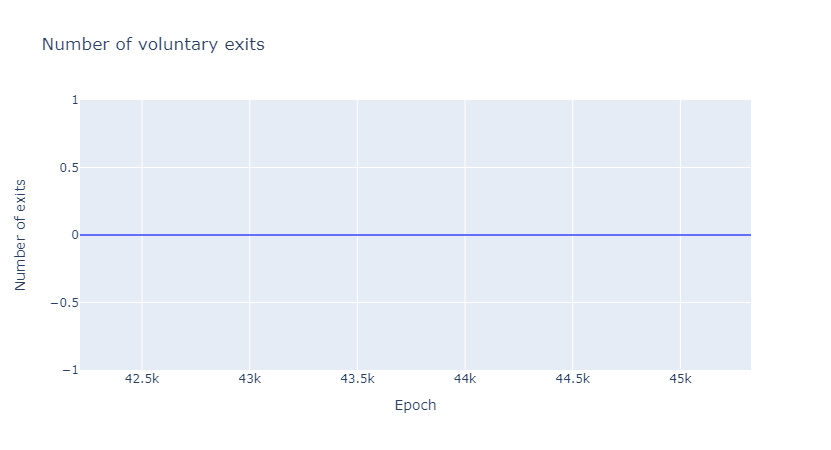

In [151]:
px.line(x=df['epoch'], y=df['exit_count'], labels = {"x": "Epoch", "y": "Number of exits"}, title = "Number of voluntary exits")

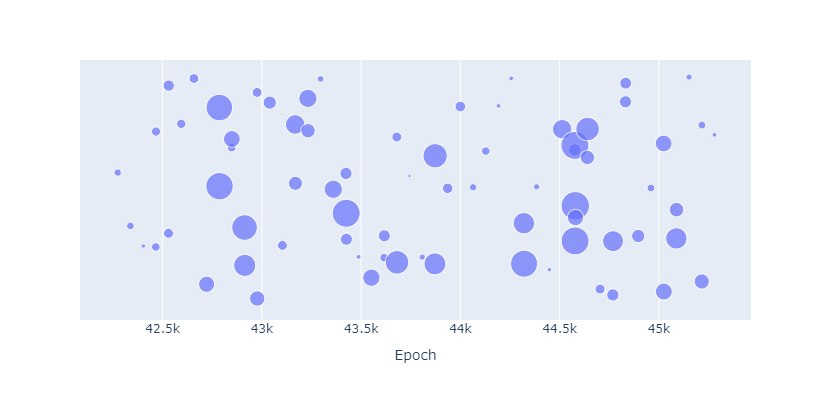

In [152]:
fig = px.scatter(
    df[df.deposits > 0], x = 'epoch', y = 'temp', size = 'deposits',
    size_max = 20, width = 800, height = 400, labels = {"epoch": "Epoch"})
fig.update_yaxes(visible=False)

In [ ]:
with open('api_key.txt', 'r') as api_file:
    api_key = api_file.read()

for i in range(164024,178089,100):
    str1 = ''

    for j in range(99):
        str1 = str1 + str(i+j) + ','
    
    str1 = str1 + str(i+99)
    
    x = requests.get('https://beaconcha.in/api/v1/validator/{}/deposits?api_key={}'.format(str1, api_key))
    #Add a sleep to stay within the call rate limits
    sleep(6)
    
    d = x.json()['data']
    
    for t in d:
        data.append(t)

In [161]:
df_deposits = pd.read_csv("out.csv")
df_deposits = df_deposits['amount']

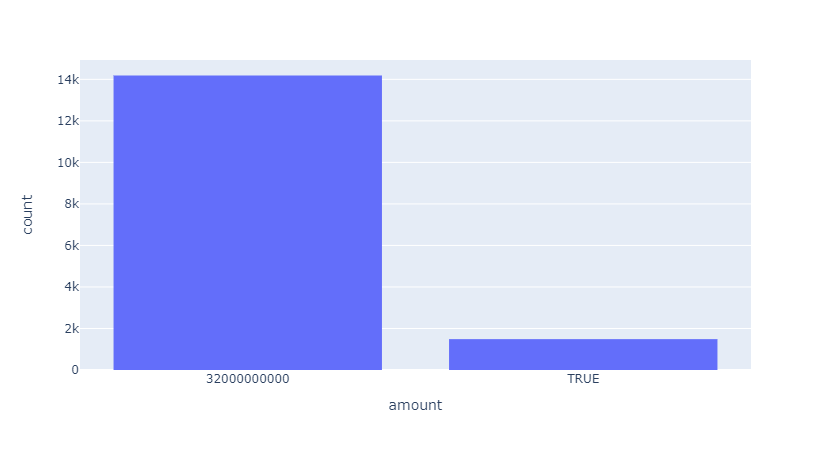

In [162]:
fig = px.histogram(df_deposits, x="amount")
fig.show()